In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('Online Retail.xlsx')

In [2]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
'''InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
StockCode: Identifier for items contained in an invoice.
Description: Textual description of each of the stock item.
Quantity: The quantity of the item purchased.
InvoiceDate: Date of purchase.
UnitPrice: Value of each item.
CustomerID: Identifier for customer making the purchase.
Country: Country of customer.
'''

'InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).\nStockCode: Identifier for items contained in an invoice.\nDescription: Textual description of each of the stock item.\nQuantity: The quantity of the item purchased.\nInvoiceDate: Date of purchase.\nUnitPrice: Value of each item.\nCustomerID: Identifier for customer making the purchase.\nCountry: Country of customer.\n'

In [41]:
data.columns = data.columns.str.lower()
data.rename({'product':'item','unitprice':'price','customerid':'id'},axis=1,inplace=True)

In [42]:
data = data[data['quantity']>0]

In [43]:
data.head()

,invoiceno,stockcode,item,quantity,invoicedate,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
user = data.groupby('id',as_index=False) \
    .agg({'price':'sum','item':'count','quantity':'sum'}) \
    .rename({'price':'sum_price','item':'item_count','quantity':'quan_sum'},axis=1)
    
user.head()

,id,sum_price,item_count,quan_sum
0,12346.0,1.04,1,74215
1,12347.0,481.21,182,2458
2,12348.0,178.71,31,2341
3,12349.0,605.10,73,631
4,12350.0,65.30,17,197


In [47]:
user.describe()

,id,sum_price,item_count,quan_sum
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,285.780275,91.708689,1194.214335
std,1721.889758,880.545716,228.792852,5055.603049
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,51.685000,17.000000,160.000000
50%,15299.000000,127.150000,41.000000,379.000000
75%,16778.500000,294.425000,100.000000,993.000000
max,18287.000000,33332.450000,7847.000000,197491.000000


In [48]:
user[user['sum_price']==user['sum_price'].max()]

,id,sum_price,item_count,quan_sum
1290,14096.0,33332.45,5111,16352


In [49]:
data[data['id']==14096.0]

,invoiceno,stockcode,item,quantity,invoicedate,price,id,country
317502,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30 10:49:00,2.46,14096.0,United Kingdom
317503,564764,16225,RATTLE SNAKE EGGS,1,2011-08-30 10:49:00,3.29,14096.0,United Kingdom
317504,564764,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1,2011-08-30 10:49:00,1.63,14096.0,United Kingdom
317505,564764,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",1,2011-08-30 10:49:00,0.83,14096.0,United Kingdom
317506,564764,84659A,WHITE TRAVEL ALARM CLOCK,2,2011-08-30 10:49:00,1.23,14096.0,United Kingdom
...,...,...,...,...,...,...,...,...
528082,580727,DOT,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096.0,United Kingdom
528083,580727,10135,COLOURING PENCILS BROWN TUBE,8,2011-12-05 17:17:00,2.46,14096.0,United Kingdom
528084,580727,11001,ASSTD DESIGN RACING CAR PEN,3,2011-12-05 17:17:00,3.29,14096.0,United Kingdom
528085,580727,15044A,PINK PAPER PARASOL,1,2011-12-05 17:17:00,5.79,14096.0,United Kingdom


In [8]:
data.groupby(['CustomerID','Description'],as_index=False).agg({'Quantity':'sum'})

,CustomerID,Description,Quantity
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,0
1,12347.0,3D DOG PICTURE PLAYING CARDS,126
2,12347.0,3D SHEET OF CAT STICKERS,12
3,12347.0,3D SHEET OF DOG STICKERS,12
4,12347.0,60 TEATIME FAIRY CAKE CASES,72
...,...,...,...
269152,18287.0,STAR T-LIGHT HOLDER WILLIE WINKIE,12
269153,18287.0,STRAWBERRY BATH SPONGE,30
269154,18287.0,STRAWBERRY CERAMIC TRINKET BOX,12
269155,18287.0,SWISS CHALET TREE DECORATION,48


In [9]:
product = data.groupby(['Description']).agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False)

In [10]:
product.head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


<AxesSubplot:xlabel='Description'>

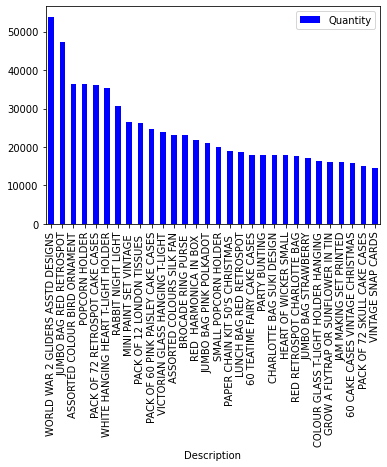

In [11]:
product.head(30).plot(kind='bar',color='blue')

In [12]:
country = data.groupby(['Description','Country'],as_index=False).agg({'Quantity':'sum'}) \
    .sort_values(by='Quantity',ascending=False) \
    .query("Quantity > 0")
country.head(10)

,Description,Country,Quantity
19628,WORLD WAR 2 GLIDERS ASSTD DESIGNS,United Kingdom,48326
8574,JUMBO BAG RED RETROSPOT,United Kingdom,43167
12809,POPCORN HOLDER,United Kingdom,34365
1161,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,33679
19118,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,33193
10830,PACK OF 12 LONDON TISSUES,United Kingdom,25307
11202,PACK OF 72 RETROSPOT CAKE CASES,United Kingdom,24702
18448,VICTORIAN GLASS HANGING T-LIGHT,United Kingdom,23242
2581,BROCADE RING PURSE,United Kingdom,22801
1203,ASSORTED COLOURS SILK FAN,United Kingdom,20322


In [13]:
cou_qua = country.groupby(by='Country').agg({'Quantity':'sum'}) \
        .sort_values(by='Quantity',ascending=False) 
cou_qua.head()

,Quantity
Country,
United Kingdom,4428219
Netherlands,200609
EIRE,142706
Germany,117484
France,110506


<AxesSubplot:xlabel='Country'>

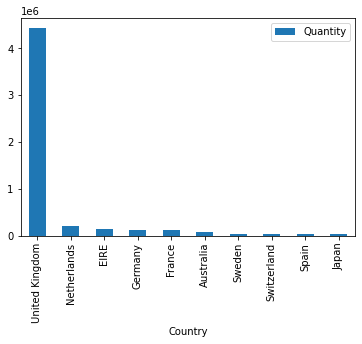

In [14]:
cou_qua.head(10).plot(kind='bar')